<a href="https://colab.research.google.com/github/lej4545/AI_Project_Mask_Detection/blob/main/0824_LeeEunJin_mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras # 텐서플로우 임포트
keras.__version__ # 버전 확인

'2.6.0'

In [ ]:
from google.colab import drive # 구글 드라이브에서 구글 colab 연동

In [ ]:
drive.mount('/content/drive') # 구글 드라이브 마운트

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os # os모듈 임포트
for dirname, _, filenames in os.walk('/content/drive/My Drive/PART1_ai_project_20210824_0830/02_Projects/03_LeeEunJin'):
    for filename in filenames: # 아마도 위에 폴더 안에 있는 파일들을 불러와서 
        os.path.join(dirname, filename) # 폴더 이름과 파일 이름을 합쳐주는 것 같다.

In [ ]:
import pandas as pd # 필요한 묘둘 임포트
import numpy as np
import seaborn as sns
from pandas import DataFrame

In [ ]:
traindir='/content/drive/My Drive/PART1_ai_project_20210824_0830/01_Images/Train' # 학습할 데이터가 들어있는 폴더 경로
validdir='/content/drive/My Drive/PART1_ai_project_20210824_0830/01_Images/Validation' #  검증하기 위한 데이터가 들어있는 폴더 경로
testdir='/content/drive/My Drive/PART1_ai_project_20210824_0830/01_Images/Test' # 테스트 데이터가 들어있는 폴더 경로

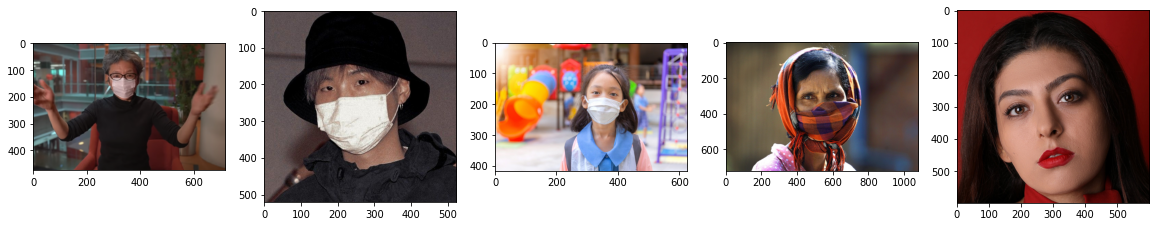

In [ ]:
path='/content/drive/My Drive/PART1_ai_project_20210824_0830/01_Images/All'# 모든 이미지가 담겨있는 폴더
import cv2 
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(20,20)) # 잘 불러오는지 확인하기 위해 임의의 5장 사진 출력
for i in range(5):
    file=random.choice(os.listdir(path))
    img_path=os.path.join(path,file)
    image=mpimg.imread(img_path)
    ax=plt.subplot(1,5,i+1)
    plt.imshow(image)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator #imagedatagenerator 임포트

# train_data, test_data 전처리
train_data=ImageDataGenerator(rescale=1.0/255, zoom_range=0.2, shear_range=0.2)
# 이미지를 불러올 때 폴더명에 맞춰 자동으로 labelling 해준다.
train_generator = train_data.flow_from_directory(directory=traindir,target_size=(64,64),class_mode='binary',batch_size=32)
test_data=ImageDataGenerator(rescale=1.0/255)
valid_generator = test_data.flow_from_directory(directory=validdir,target_size=(64,64),class_mode='binary',batch_size=32)
test_generator = test_data.flow_from_directory(directory=testdir,target_size=(64,64),class_mode='binary',batch_size=32,shuffle=False)

# 추가적으로 imagedatagenerator 를 이용하여 image augmentation 를 진행해야 함.

print(valid_generator.class_indices)

Found 600 images belonging to 2 classes.
Found 306 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
{'WithMask': 0, 'WithoutMask': 1}


In [ ]:
from tensorflow.keras import layers, Sequential
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input


vgg19 = VGG19(weights='imagenet',include_top=False,input_shape=(64,64,3))

for layer in vgg19.layers:
    layer.trainable = False
    
vmodel = Sequential()
vmodel.add(vgg19)
vmodel.add(layers.Flatten())
vmodel.add(layers.Dense(1,activation='sigmoid'))
vmodel.summary()

vmodel.compile(optimizer='adam',loss='binary_crossentropy', metrics='accuracy')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 2, 2, 512)         20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2049      
Total params: 20,026,433
Trainable params: 2,049
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:
history = vmodel.fit(train_generator,steps_per_epoch=len(train_generator)//8,epochs=20,validation_data=valid_generator, batch_size = 256)


Epoch 1/20
2/2 [==============================] - 28s 23s/step - loss: 1.0143 - accuracy: 0.5469 - val_loss: 0.8803 - val_accuracy: 0.5000
Epoch 2/20
2/2 [==============================] - 25s 23s/step - loss: 0.7582 - accuracy: 0.5781 - val_loss: 0.6919 - val_accuracy: 0.5229
Epoch 3/20
2/2 [==============================] - 25s 23s/step - loss: 0.6966 - accuracy: 0.5781 - val_loss: 0.6262 - val_accuracy: 0.6797
Epoch 4/20
2/2 [==============================] - 25s 23s/step - loss: 0.6393 - accuracy: 0.7031 - val_loss: 0.6272 - val_accuracy: 0.6536
Epoch 5/20
2/2 [==============================] - 25s 23s/step - loss: 0.6127 - accuracy: 0.6406 - val_loss: 0.6359 - val_accuracy: 0.6209
Epoch 6/20
2/2 [==============================] - 25s 23s/step - loss: 0.7226 - accuracy: 0.5000 - val_loss: 0.6228 - val_accuracy: 0.6209
Epoch 7/20
2/2 [==============================] - 25s 23s/step - loss: 0.6300 - accuracy: 0.6406 - val_loss: 0.5940 - val_accuracy: 0.6634
Epoch 8/20
2/2 [===========

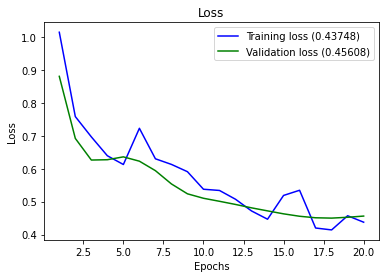

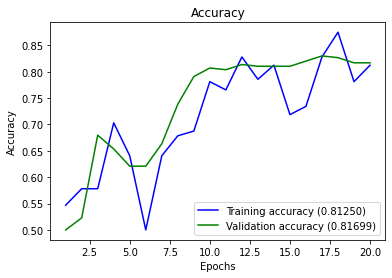

In [ ]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
plot_history(history)

Mask detected


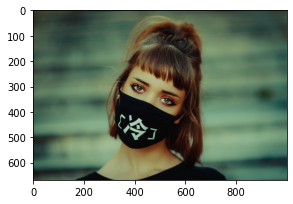

In [ ]:
from PIL import Image
import tensorflow as tf

img='/content/drive/My Drive/PART1_ai_project_20210824_0830/01_Images/Test/WithMask/2070.jpg'
plt.figure(figsize=(10,10))
image=Image.open(img)
ax=plt.subplot(1,2,1)
plt.imshow(image)
image=np.resize(image,(1,64,64,3))
image = image.astype('float32')
image /= 255  

if vmodel.predict(image)[0][0]<0.5:
    print("Mask detected")
else:
    print("No mask detected")

In [ ]:
predictions=vmodel.predict(test_generator)
predictions=np.round(predictions)
y=np.hstack((np.zeros(483),np.ones(992-483)))

m = tf.keras.metrics.BinaryAccuracy()
m.update_state(y,predictions)
m.result()

InvalidArgumentError: ignored